## 1. Packages

In [3]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
import netCDF4 as nc
import xarray as xr
from scipy.signal import find_peaks
from numpy.polynomial import Polynomial as P
from scipy import fftpack
from scipy import signal

'Functions from local module:'
import tools_V13 as tl

## 2. Read the data

In [5]:
#Temperature
fnT = '/home/silvatol/Documents/Stage/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.1h_votemper_0-2500m.nc'
#fnT = 'C:/Users/ASUS/Downloads/Project 1D model/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.1h_votemper_0-2500m.nc'
dsT = xr.open_dataset(fnT)


#Salinity
fnS = '/home/silvatol/Documents/Stage/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.1h_vosaline_0-2500m.nc'
#fnS = 'C:/Users/ASUS/Downloads/Project 1D model/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.1h_vosaline_0-2500m.nc'
dsS = xr.open_dataset(fnS)

#U10 wind velocity
fnU10 = '/home/silvatol/Documents/Stage/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.3h_u10.nc'
#fnVg = 'C:/Users/ASUS/Downloads/Project 1D model/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.3h_u10.nc'
dsU10 = xr.open_dataset(fnU10)


#V10 wind velocity
fnV10 = '/home/silvatol/Documents/Stage/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.3h_v10.nc'
#fnVg = 'C:/Users/ASUS/Downloads/Project 1D model/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.3h_v10.nc'
dsV10 = xr.open_dataset(fnV10)

#Wind velocity module
fnW = '/home/silvatol/Documents/Stage/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.3h_wind10.nc'
#fnS = 'C:/Users/ASUS/Downloads/Project 1D model/Codes/Data/eNATL60pDYF-BLB002_y2010m01d01-y2010m07d31.1h_vosaline_0-2500m.nc'
dsW = xr.open_dataset(fnW)



In [6]:
#Remove some not desire coordinates and get values for wind velocity
U10 = dsU10.squeeze("x").squeeze("y").u10.values
np.savetxt("U10.txt",U10)
V10 = dsV10.squeeze("x").squeeze("y").v10.values
np.savetxt("V10.txt",V10)

In [7]:
#Remove some not desire coordinates for temperature and salinity
T = dsT.squeeze("x").squeeze("y").votemper.sel(deptht=slice('0','302'))
S = dsS.squeeze("x").squeeze("y").vosaline.sel(deptht=slice('0','302'))

#Interpolation along the dept to have a DeltaZ = 1m

new_depth = np.linspace(4.804548e-01,301.86157,301)
Ti = T.interp(deptht=new_depth)
Si = S.interp(deptht=new_depth)

H = Ti

#Data of temperature and salinity

winter_day = '2010-01-31T12:30:00.000000000'
spring_day = '2010-04-30T12:30:00.000000000'
summer_day = '2010-07-31T12:30:00.000000000'

T_win = Ti.sel(time_counter = winter_day)
T_spr = Ti.sel(time_counter = spring_day)
T_sum = Ti.sel(time_counter = summer_day)

S_win = Si.sel(time_counter = winter_day)
S_spr = Si.sel(time_counter = spring_day)
S_sum = Si.sel(time_counter = summer_day)




In [84]:
#Saving data of temperature and salinity
T_win_s = T_win.values
T_spr_s = T_spr.values
T_sum_s = T_sum.values

np.savetxt("T_winter.txt",T_win_s)
np.savetxt("T_spring.txt",T_spr_s)
np.savetxt("T_summer.txt",T_sum_s)

S_win_s = S_win.values
S_spr_s = S_spr.values
S_sum_s = S_sum.values

np.savetxt("S_winter.txt",S_win_s)
np.savetxt("S_spring.txt",S_spr_s)
np.savetxt("S_summer.txt",S_sum_s)

#### Some plots to check the interporlations

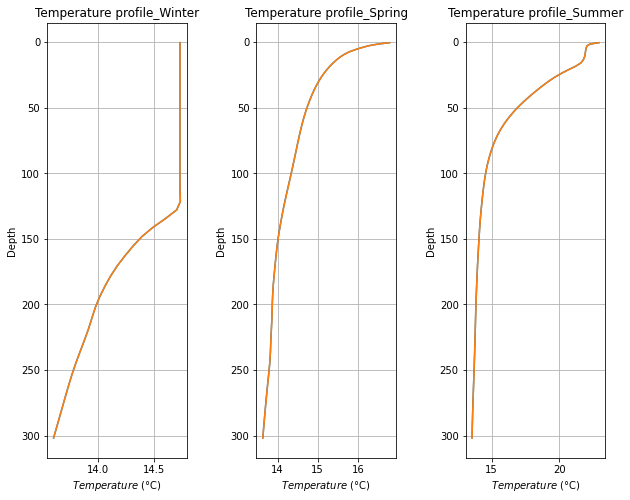

In [80]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.subplots_adjust(wspace = 0.5, hspace = 0.8)
fig.set_size_inches(10, 8)

T.sel(time_counter=winter_day).plot.line(y="deptht",ax=ax1)
T_win.plot.line(y="deptht",ax=ax1)
ax1.grid('on')
ax1.set_title("Temperature profile_Winter")
ax1.set_xlabel('$Temperature$ (°C)')
ax1.set_ylabel('Depth')
ax1.invert_yaxis()

T.sel(time_counter=spring_day).plot.line(y="deptht",ax=ax2)
T_spr.plot.line(y="deptht",ax=ax2)
ax2.grid('on')
ax2.set_title("Temperature profile_Spring")
ax2.set_xlabel('$Temperature$ (°C)')
ax2.set_ylabel('Depth')
ax2.invert_yaxis()

T.sel(time_counter=summer_day).plot.line(y="deptht",ax=ax3)
T_sum.plot.line(y="deptht",ax=ax3)
ax3.grid('on')
ax3.set_title("Temperature profile_Summer")
ax3.set_xlabel('$Temperature$ (°C)')
ax3.set_ylabel('Depth')
ax3.invert_yaxis()

plt.savefig('Temperature_profile.jpg', bbox_inches='tight')

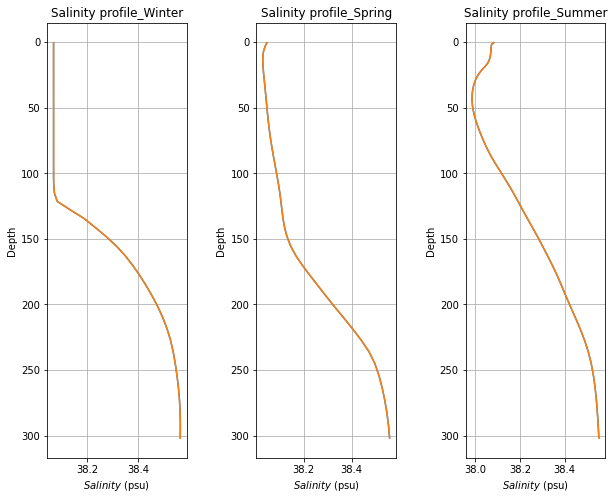

In [81]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.subplots_adjust(wspace = 0.5, hspace = 0.8)
fig.set_size_inches(10, 8)

S[:,0:66].sel(time_counter=winter_day).plot.line(y="deptht",ax=ax1)
S_win.plot.line(y="deptht",ax=ax1)
ax1.grid('on')
ax1.set_title("Salinity profile_Winter")
ax1.set_xlabel('$Salinity$ (psu)')
ax1.set_ylabel('Depth')
ax1.invert_yaxis()

S[:,0:66].sel(time_counter=spring_day).plot.line(y="deptht",ax=ax2)
S_spr.plot.line(y="deptht",ax=ax2)
ax2.grid('on')
ax2.set_title("Salinity profile_Spring")
ax2.set_xlabel('$Salinity$ (psu)')
ax2.set_ylabel('Depth')
ax2.invert_yaxis()

S[:,0:66].sel(time_counter=summer_day).plot.line(y="deptht",ax=ax3)
S_sum.plot.line(y="deptht",ax=ax3)
ax3.grid('on')
ax3.set_title("Salinity profile_Summer")
ax3.set_xlabel('$Salinity$ (psu)')
ax3.set_ylabel('Depth')
ax3.invert_yaxis()

plt.savefig('Salinity_profile.jpg', bbox_inches='tight')

Text(0.5, 0, 'time (days)')

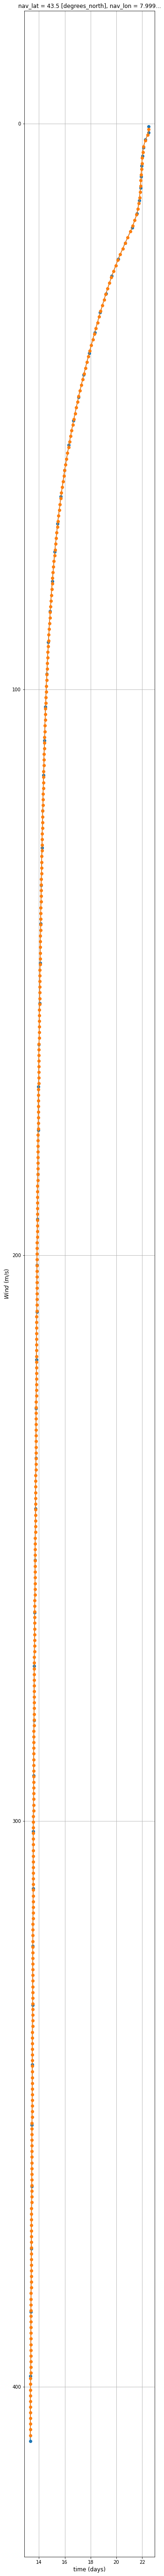

In [33]:
T[:,0:66].sel(time_counter='2010-07-31T20:30:00.000000000').plot.line(y="deptht",marker="o")
Ti.sel(time_counter='2010-07-31T20:30:00.000000000').plot.line(y="deptht",marker="o")
plt.gca().invert_yaxis()
plt.rcParams["figure.figsize"] = (5,100)
plt.grid('on')
plt.ylabel('$Wind$ (m/s)', fontsize=12)
plt.xlabel('time (days)', fontsize=12)

Text(0.5, 0, 'time (days)')

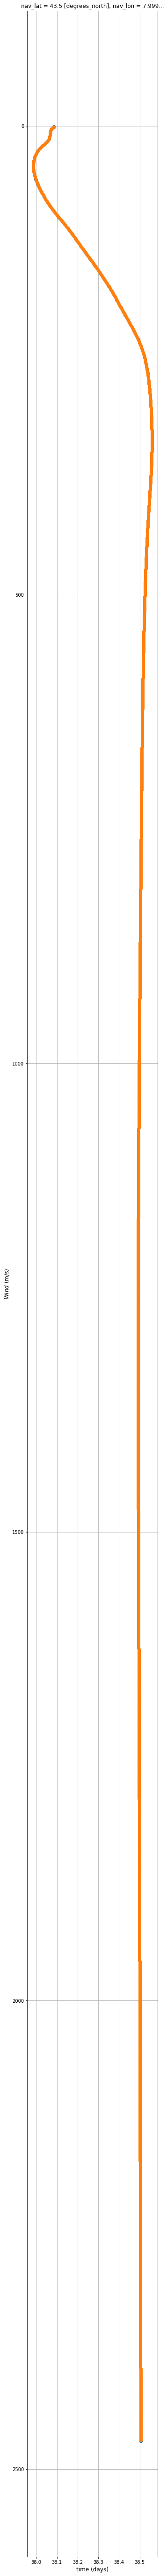

In [92]:
S.sel(time_counter='2010-07-31T20:30:00.000000000').plot.line(y="deptht",marker="o")
Si.sel(time_counter='2010-07-31T20:30:00.000000000').plot.line(y="deptht",marker="o")
plt.gca().invert_yaxis()
plt.rcParams["figure.figsize"] = (5,100)
plt.grid('on')
plt.ylabel('$Wind$ (m/s)', fontsize=12)
plt.xlabel('time (days)', fontsize=12)